In [1]:
import os
import sys
import pandas as pd
os.chdir('..')
from db_connection.connection import PostgresConnection
#sys.path.append(os.path.abspath('../src'))
#from src.utils import missing_values_table, convert_bytes_to_megabytes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats 
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
import streamlit as st


Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [2]:
from src.utils import missing_values_table, convert_bytes_to_megabytes

In [3]:
print(os.getcwd())

c:\Users\Tesfaye\Documents\10thacademy\KAIM_week2\TelecomProfitAnalysis


In [3]:
db = PostgresConnection(dbname='telecom', user='postgres', password='postgres')
db.connect()

# Example query
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [4]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [8]:
df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [5]:
df.to_csv('useroverview.csv', index=False)

In [11]:
print(df.columns.tolist())

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [7]:
# Top 10 handsets used by customers
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", top_handsets)

# Top 3 manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Manufacturers:\n", top_manufacturers)

# Top 5 handsets per top 3 manufacturers
top_5_handsets_per_manufacturer = {}
for manufacturer in top_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print("\nTop 5 Handsets per Manufacturer:\n", top_5_handsets_per_manufacturer)

Top 10 Handsets:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Top 3 Manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets per Manufacturer:
 {'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G93

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_1816\432488421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='viridis')


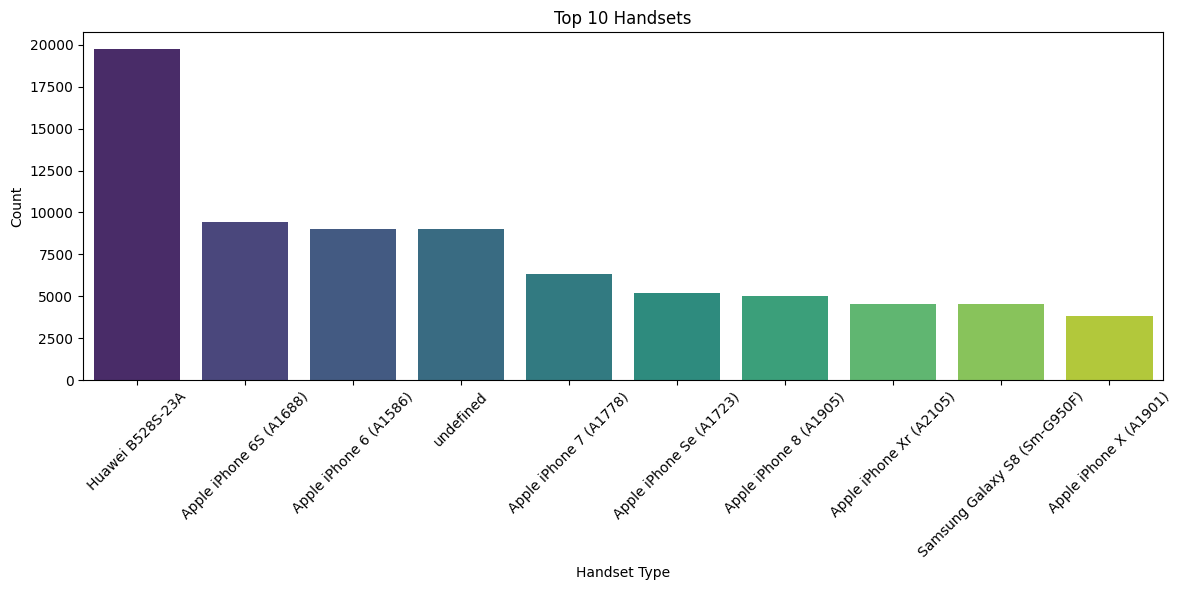

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_1816\432488421.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='coolwarm')


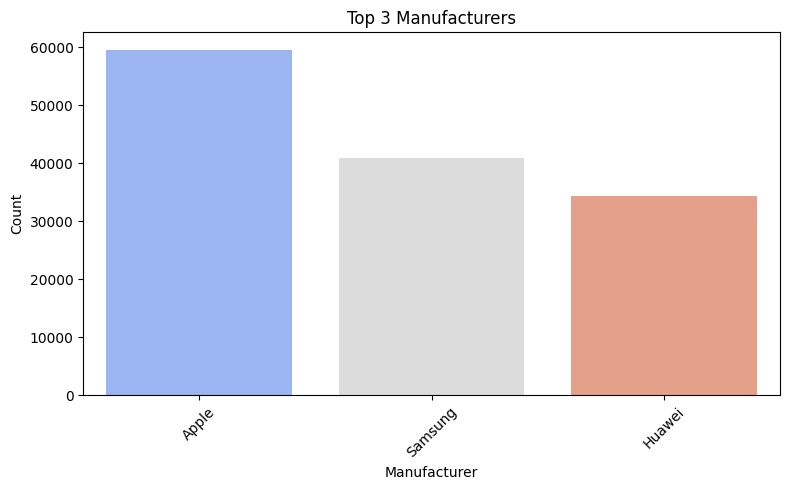

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_1816\432488421.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.index, y=handsets.values, palette='magma')


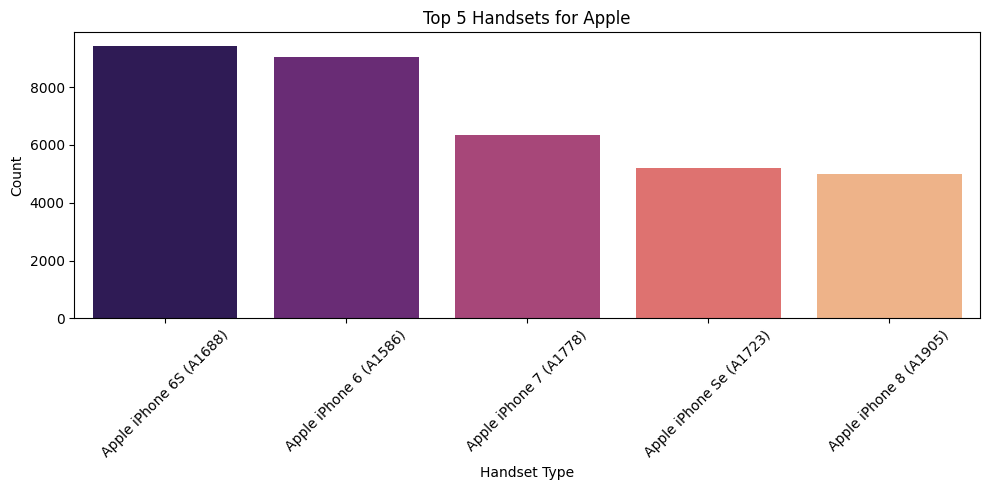

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_1816\432488421.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.index, y=handsets.values, palette='magma')


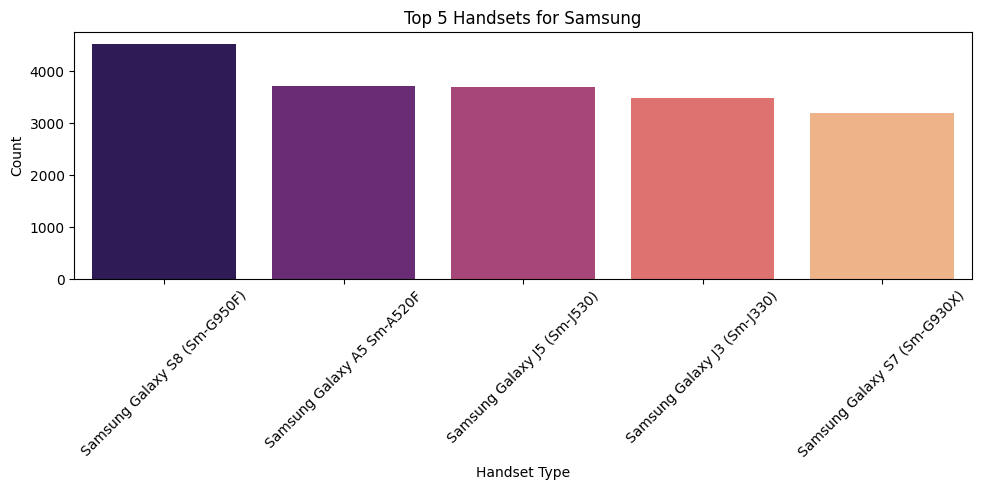

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_1816\432488421.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.index, y=handsets.values, palette='magma')


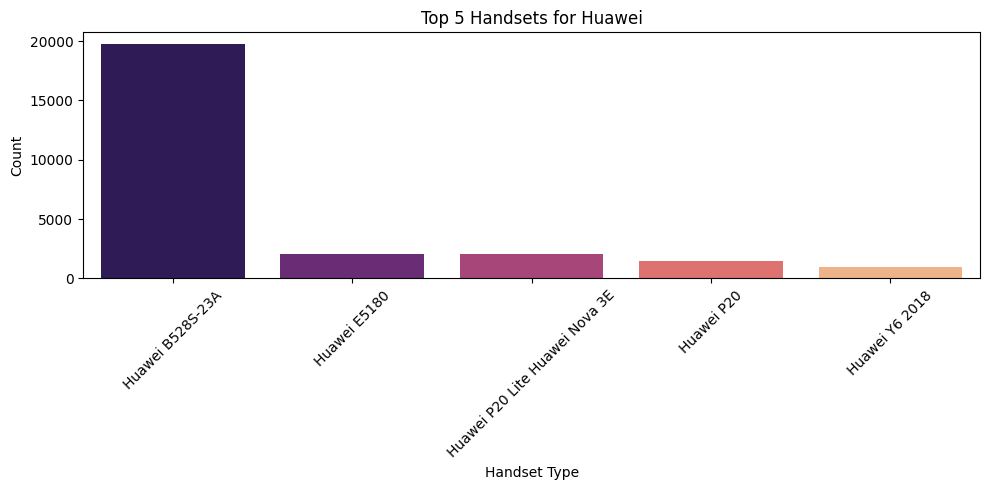

In [8]:

# Bar chart for Top 10 Handsets
plt.figure(figsize=(12, 6))
sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='viridis')
plt.title('Top 10 Handsets')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for Top 3 Manufacturers
plt.figure(figsize=(8, 5))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='coolwarm')
plt.title('Top 3 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for Top 5 Handsets per Manufacturer
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=handsets.index, y=handsets.values, palette='magma')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [9]:
# Aggregate user behavior metrics
user_behavior = df.groupby('MSISDN/Number').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum')
).reset_index()

print(user_behavior.head())

   MSISDN/Number  number_of_xdr_sessions  total_session_duration  \
0   3.360100e+10                       1                116720.0   
1   3.360100e+10                       1                181230.0   
2   3.360100e+10                       1                134969.0   
3   3.360101e+10                       1                 49878.0   
4   3.360101e+10                       2                 37104.0   

   total_download  total_upload  
0    8.426375e+08    36053108.0  
1    1.207552e+08    36104459.0  
2    5.566597e+08    39306820.0  
3    4.019932e+08    20327526.0  
4    1.363130e+09    94280527.0  


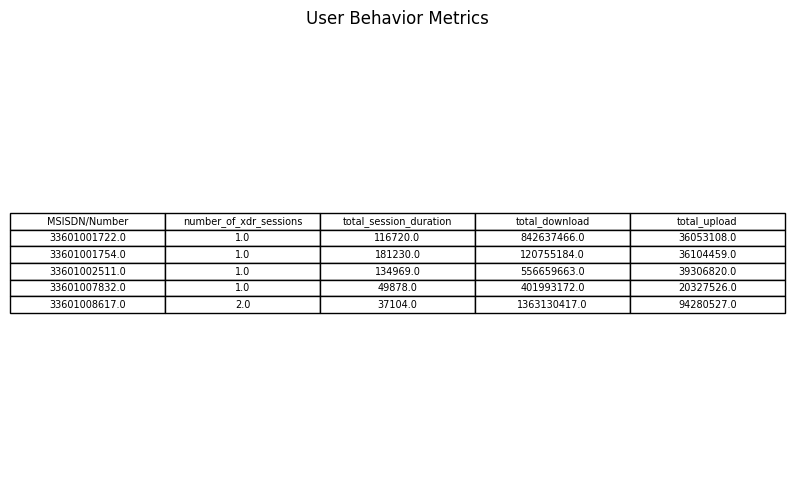

In [10]:

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = user_behavior.head().values.tolist()
table_columns = user_behavior.columns.tolist()
ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

plt.title('User Behavior Metrics')
plt.show()

In [27]:
# List of applications with their corresponding download and upload columns
app_columns = {
    'Social Media': ('Social Media DL (Bytes)', 'Social Media UL (Bytes)'),
    'Google': ('Google DL (Bytes)', 'Google UL (Bytes)'),
    'Email': ('Email DL (Bytes)', 'Email UL (Bytes)'),
    'Youtube': ('Youtube DL (Bytes)', 'Youtube UL (Bytes)'),
    'Netflix': ('Netflix DL (Bytes)', 'Netflix UL (Bytes)'),
    'Gaming': ('Gaming DL (Bytes)', 'Gaming UL (Bytes)'),
    'Other': ('Other DL (Bytes)', 'Other UL (Bytes)')
}

# Initialize a dictionary to hold the aggregation functions
agg_funcs = {}
for app, (dl_col, ul_col) in app_columns.items():
    agg_funcs[f'total_{app.lower().replace(" ", "_")}_dl'] = (dl_col, 'sum')
    agg_funcs[f'total_{app.lower().replace(" ", "_")}_ul'] = (ul_col, 'sum')

# Group by MSISDN and aggregate the total data volume for each application
user_app_behavior = df.groupby('MSISDN/Number').agg(**agg_funcs).reset_index()

# Display the resulting DataFrame
print(user_app_behavior.head())

   MSISDN/Number  total_social_media_dl  total_social_media_ul  \
0   3.360100e+10              2206504.0                25631.0   
1   3.360100e+10              2598548.0                62017.0   
2   3.360100e+10              3148004.0                47619.0   
3   3.360101e+10               251469.0                28825.0   
4   3.360101e+10              2861230.0                51312.0   

   total_google_dl  total_google_ul  total_email_dl  total_email_ul  \
0        3337123.0        1051882.0        837400.0        493962.0   
1        4197697.0        1137166.0       2828821.0        478960.0   
2        3343483.0          99643.0       2436500.0        768880.0   
3        5937765.0        3740728.0       2178618.0        106052.0   
4       13728668.0        4770948.0       2247808.0       1057661.0   

   total_youtube_dl  total_youtube_ul  total_netflix_dl  total_netflix_ul  \
0        14900201.0         6724347.0        10265105.0        16915876.0   
1         5324251.0   

In [31]:

# Handle Missing Values
# Fill missing values with the mean of each numeric column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Get numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#Identify and Treat Outliers
# Identifying outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the mean of the corresponding column
for col in numeric_cols:
    df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), df[col].mean())

# Display the cleaned DataFrame
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

       Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  104608.560347  2.082014e+14   3.366496e+10  3.552121e+13   
1  104608.560347  2.082019e+14   3.368185e+10  3.579401e+13   
2  104608.560347  2.082016e+14   4.188282e+10  3.528151e+13   
3  104608.560347  2.082014e+14   4.188282e+10  3.535661e+13   
4  104608.560347  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.

In [34]:
# Descriptive statistics
description = df.describe()
print(description)

          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501433e+10  4.847455e+13        67.089326   
std    3.310759e+08   3.052711e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365182e+10  3.5462

In [35]:
# Segment users into deciles based on total session duration
df['duration_class'] = pd.qcut(df['Dur. (ms)'], 5, labels=False)

# Compute total DL+UL per decile class
decile_data = df.groupby('duration_class').agg(
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum')
).reset_index()

print(decile_data)

   duration_class  total_download  total_upload
0               0    1.364976e+13  1.234483e+12
1               1    2.165754e+13  1.962339e+12
2               2    5.582355e+12  5.067617e+11
3               3    1.359129e+13  1.231772e+12
4               4    1.371603e+13  1.232643e+12


In [36]:
#  Calculate Total Duration for Each User
# Assuming 'Dur. (ms)' is the column representing session duration
df['Total Duration (ms)'] = df.groupby('MSISDN/Number')['Dur. (ms)'].transform('sum')

# Segment Users into Deciles
# Create deciles based on total duration
df['Decile Class'] = pd.qcut(df['Total Duration (ms)'], 5, labels=False)

# Compute Total Data (DL + UL) per Decile Class
# Assuming 'Total DL (Bytes)' and 'Total UL (Bytes)' are the relevant columns
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Group by Decile Class and compute the total data
total_data_per_decile = df.groupby('Decile Class')['Total Data (Bytes)'].sum().reset_index()

# Display the results
print(total_data_per_decile)

   Decile Class  Total Data (Bytes)
0             0        1.489618e+13
1             1        1.488632e+13
2             2        1.489197e+13
3             3        1.487864e+13
4             4        1.481186e+13


In [38]:
#BasicMetrics

basic_metrics = df.describe()

# Display the basic metrics
print(basic_metrics)

          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501433e+10  4.847455e+13        67.089326   
std    3.310759e+08   3.052711e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365182e+10  3.5462

In [40]:
# Select only quantitative columns
quantitative_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate dispersion parameters
dispersion_parameters = df[quantitative_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])

# Calculate range and IQR
dispersion_parameters.loc['range'] = dispersion_parameters.loc['max'] - dispersion_parameters.loc['min']
Q1 = df[quantitative_cols].quantile(0.25)
Q3 = df[quantitative_cols].quantile(0.75)
dispersion_parameters.loc['IQR'] = Q3 - Q1

# Display the results
print(dispersion_parameters)

           Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
mean    1.013887e+19    499.188200    498.800880  9.285257e+04  2.082016e+14   
median  7.349883e+18    499.000000    500.000000  8.639900e+04  2.082016e+14   
std     2.883600e+18    288.610872    288.096693  4.934896e+04  3.310759e+08   
var     8.315146e+36  83296.235554  82999.704445  2.435320e+09  1.096113e+17   
min     6.917538e+18      0.000000      0.000000  7.142000e+03  2.082009e+14   
max     1.318654e+19    999.000000    999.000000  2.449000e+05  2.082022e+14   
range   6.269004e+18    999.000000    999.000000  2.377580e+05  1.351618e+09   
IQR     5.692543e+18    499.000000    499.000000  5.929500e+04  3.687309e+08   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean     3.501433e+10  4.847455e+13        67.089326        10.721812   
median   3.366386e+10  3.572241e+13        54.000000         7.000000   
std      3.052711e+09  2.237359e+13        39.123157        

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_4100\2413635737.py:25: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


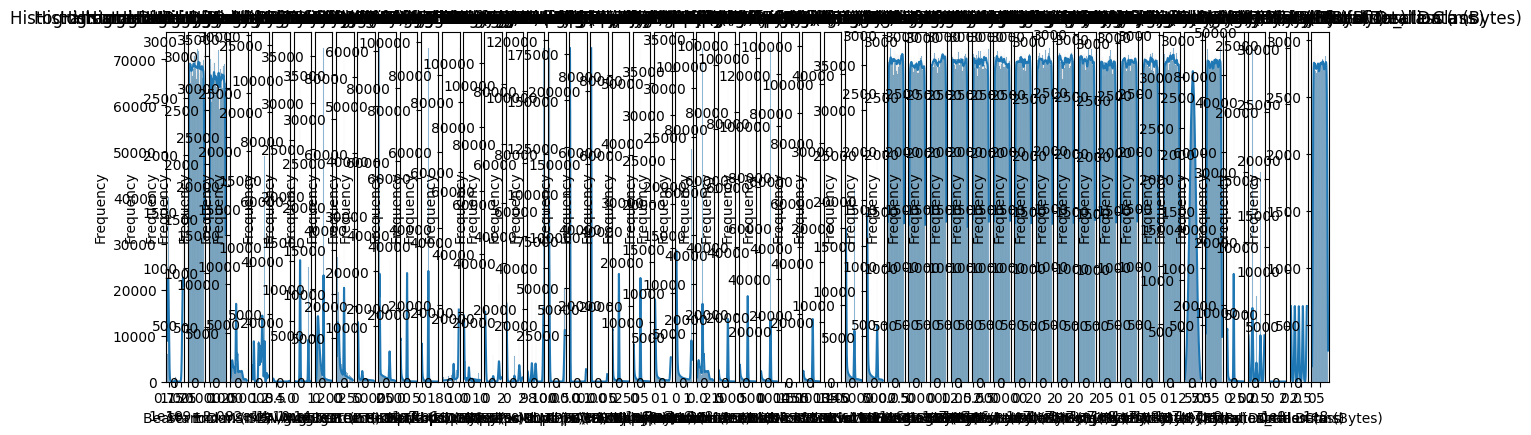

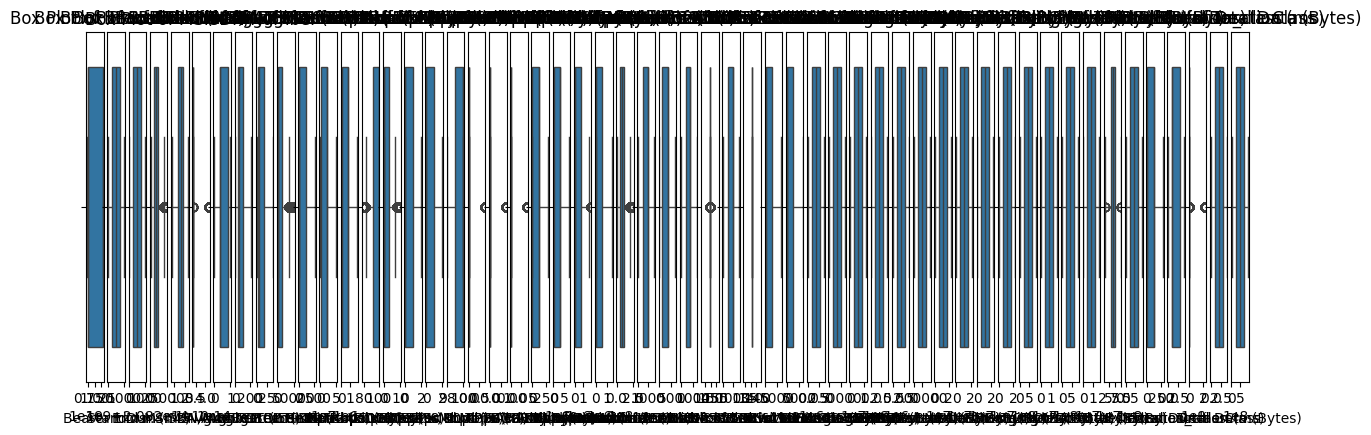

In [43]:


# Select quantitative columns
quantitative_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting environment
plt.figure(figsize=(15, 10))
# Histogram and Density Plot
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, len(quantitative_cols), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Box Plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, len(quantitative_cols), i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [44]:
# Calculate Total DL + UL data
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# List of applications
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
               'Other DL (Bytes)']

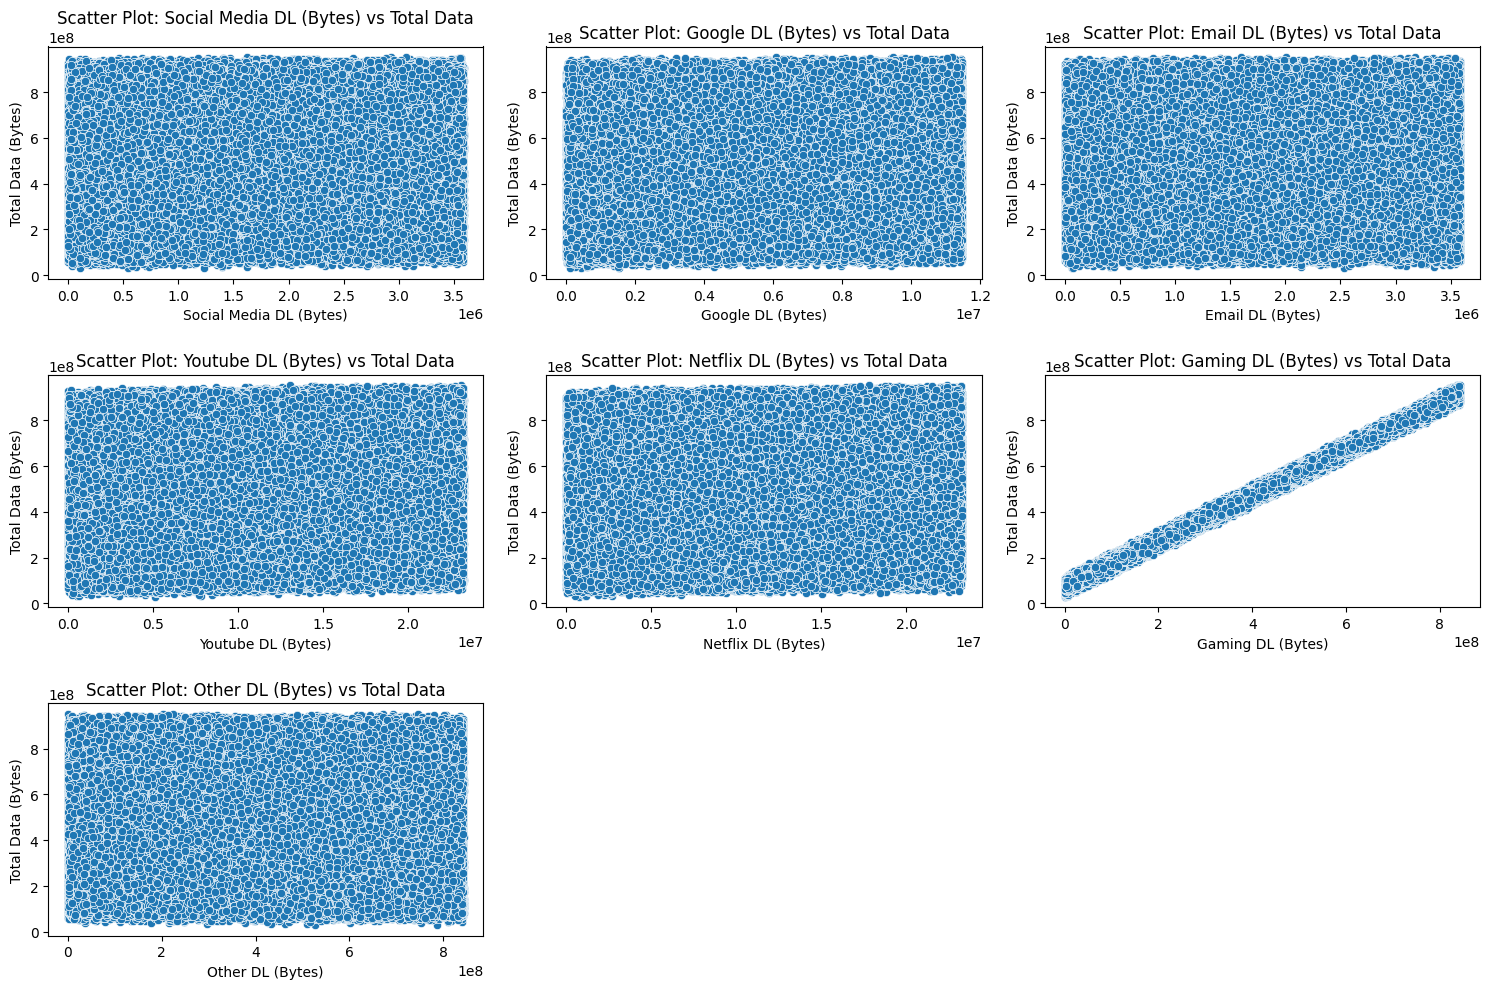

In [45]:
#  Scatter Plots
plt.figure(figsize=(15, 10))
for i, app in enumerate(app_columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[app], y=df['Total Data (Bytes)'])
    plt.title(f'Scatter Plot: {app} vs Total Data')
    plt.xlabel(app)
    plt.ylabel('Total Data (Bytes)')
plt.tight_layout()
plt.show()

In [46]:
# Correlation Coefficients
correlation_matrix = df[app_columns + ['Total Data (Bytes)']].corr()
print(correlation_matrix['Total Data (Bytes)'])


Social Media DL (Bytes)    0.005378
Google DL (Bytes)          0.012094
Email DL (Bytes)           0.004305
Youtube DL (Bytes)         0.025656
Netflix DL (Bytes)         0.024308
Gaming DL (Bytes)          0.998084
Other DL (Bytes)          -0.002799
Total Data (Bytes)         1.000000
Name: Total Data (Bytes), dtype: float64


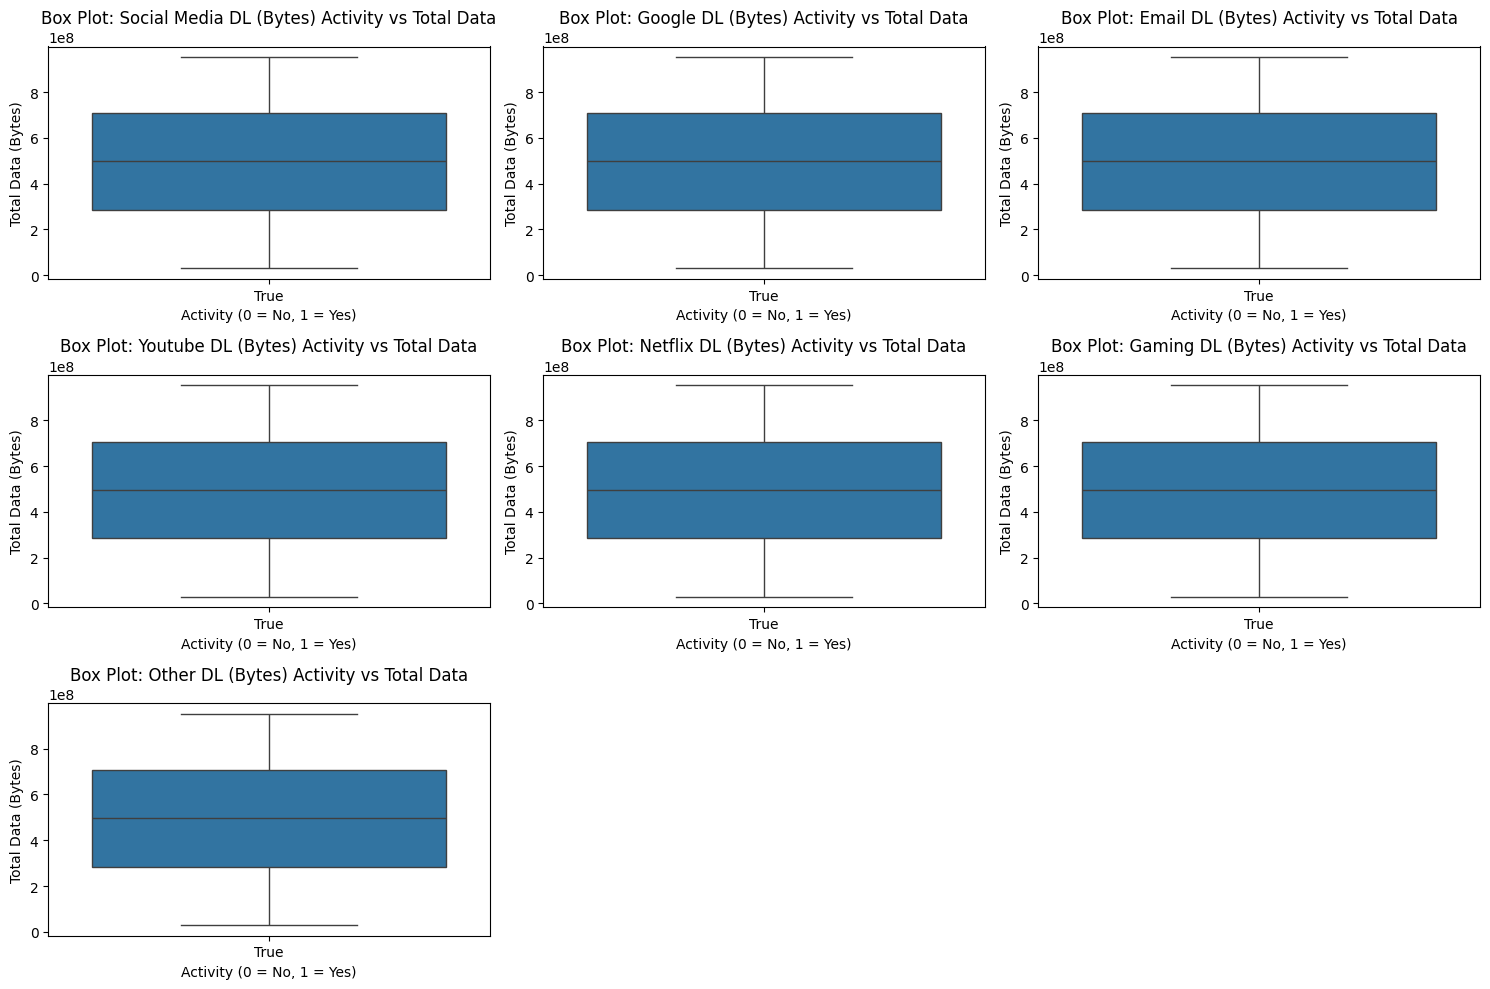

In [47]:
# Box Plots
plt.figure(figsize=(15, 10))
for i, app in enumerate(app_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[app] > 0, y=df['Total Data (Bytes)'])
    plt.title(f'Box Plot: {app} Activity vs Total Data')
    plt.xlabel('Activity (0 = No, 1 = Yes)')
    plt.ylabel('Total Data (Bytes)')
plt.tight_layout()
plt.show()

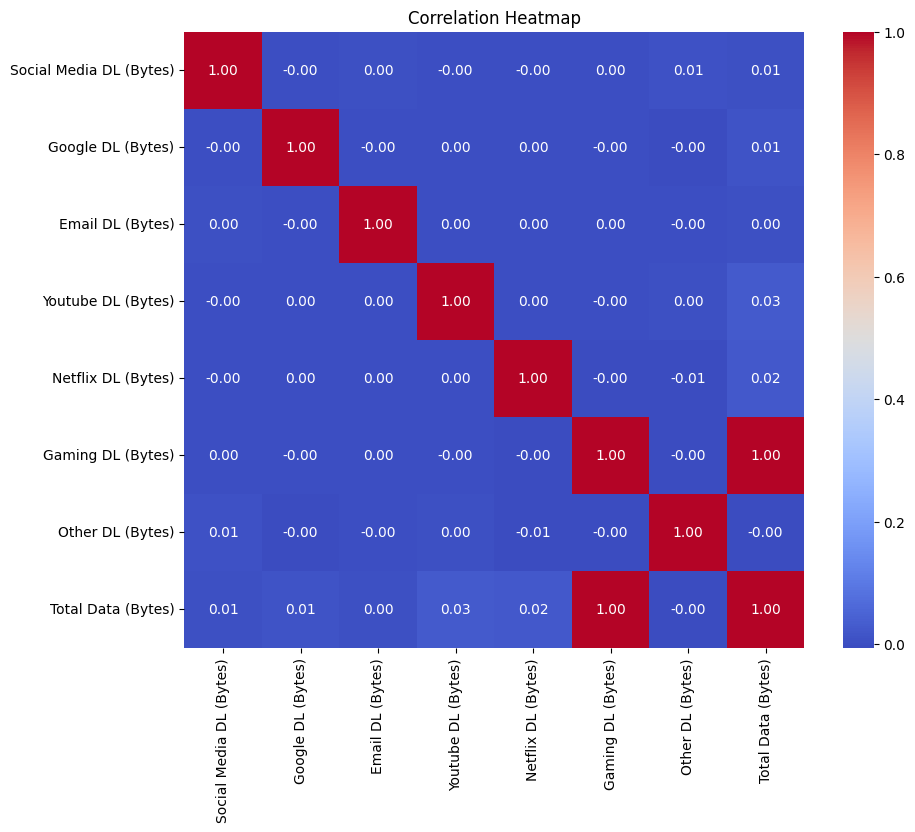

In [48]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
# Define the relevant columns for correlation analysis
correlation_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Calculate total data for each application
for col in correlation_columns:
    if 'DL' in col:
        app_name = col.split(' ')[0]
        df[f'{app_name} Total (Bytes)'] = df[col] + df[col.replace('DL', 'UL')]

In [55]:
# Check original column names
print(df.columns.tolist())

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [56]:
# Define the relevant download and upload columns
dl_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'
]

ul_columns = [
    'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)'
]

In [57]:
# Step 1: Calculate total data for each application
for dl_col, ul_col in zip(dl_columns, ul_columns):
    app_name = dl_col.split(' ')[0]
    # Check if both columns exist
    if dl_col in df.columns and ul_col in df.columns:
        df[f'{app_name} Total (Bytes)'] = df[dl_col] + df[ul_col]
    else:
        print(f"Warning: Columns {dl_col} or {ul_col} not found in the DataFrame.")

# Step 2: Select only the total data columns for correlation
total_data_columns = [f'{app_name} Total (Bytes)' for app_name in 
                      ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]

In [58]:
# Ensure total data columns were created before proceeding
print("Total Data Columns:", total_data_columns)
print("Available Columns:", df.columns.tolist())

Total Data Columns: ['Social Media Total (Bytes)', 'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']
Available Columns: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with

In [66]:
#  Compute the correlation matrix if total data columns exist
if all(col in df.columns for col in total_data_columns):
    correlation_matrix = df[total_data_columns].corr()
    
  



In [60]:
 #  Display the correlation matrix
print(correlation_matrix)

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   
Total Data (Bytes)                      0.005378           0.012094   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.

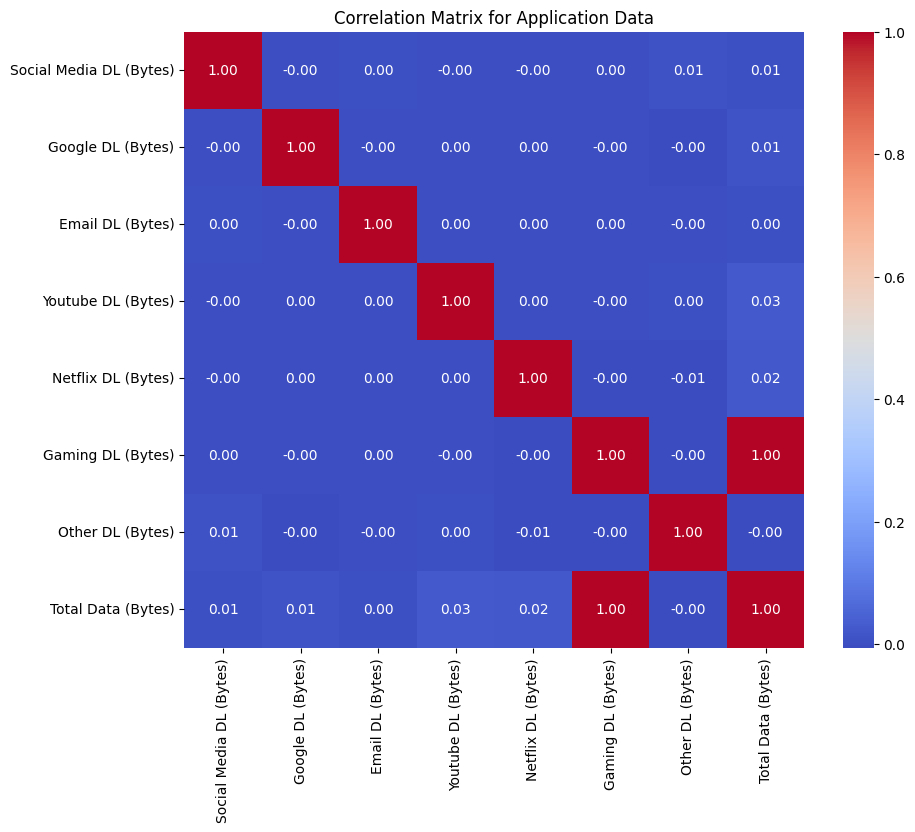

In [65]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Application Data')
plt.show()


In [113]:
# Define the relevant download and upload columns
dl_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'
]

ul_columns = [
    'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)'
]

In [114]:
#  Calculate total data for each application
for dl_col, ul_col in zip(dl_columns, ul_columns):
    app_name = dl_col.split(' ')[0]
    
    # Initialize download and upload columns if they are missing
    if dl_col not in df.columns:
        print(f"Warning: Column {dl_col} not found. Initializing with zeros.")
        df[dl_col] = 0
    if ul_col not in df.columns:
        print(f"Warning: Column {ul_col} not found. Initializing with zeros.")
        df[ul_col] = 0
    
    # Calculate total data
    df[f'{app_name} Total (Bytes)'] = df[dl_col] + df[ul_col]

# Check existing columns after attempting to create total data columns
print("Current DataFrame Columns:", df.columns.tolist())


Current DataFrame Columns: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (

In [115]:
# Verify if total data columns were created
print("Total Data Columns:", total_data_columns)
print("Available Columns:", df.columns.tolist())
# Check existing columns after attempting to create total data columns
print("Current DataFrame Columns:", df.columns.tolist())

Total Data Columns: ['Social Media Total (Bytes)', 'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']
Available Columns: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with

In [118]:
# Define the total data columns for PCA
total_data_columns = [f'{app_name} Total (Bytes)' for app_name in 
                      [ 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]

# Verify if total data columns were created
missing_columns = [col for col in total_data_columns if col not in df.columns]

if not missing_columns:
    print("All total data columns are present.")
else:
    print(f"Missing total data columns were filled. Columns: {missing_columns}.")

# Standardize the Data for PCA
x = df[total_data_columns]
x = StandardScaler().fit_transform(x)
# Step 4: Compute PCA
pca = PCA(n_components=len(total_data_columns))  # Keep all components initially
pca.fit(x)  # Fit the PCA model

# Transform the data
principal_components = pca.transform(x)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(total_data_columns))])

#  Explained Variance
explained_variance = pca.explained_variance_ratio_

All total data columns are present.


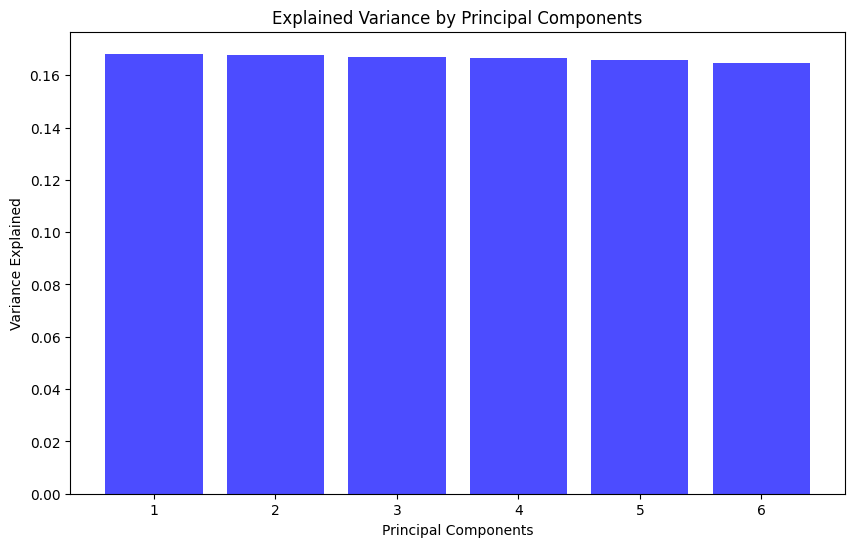

Explained Variance Ratio: [0.16823008 0.16768594 0.1668618  0.16669406 0.16590644 0.16462169]


In [119]:
# Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

# Print explained variance
print("Explained Variance Ratio:", explained_variance)